In [3]:
import numpy as np
from pymoo.core.problem import Problem,ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
import matplotlib.pyplot as plt

from pymoo.config import Config
Config.warnings['not_compiled'] = False



In [4]:
class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0]**2 + x[1]**2)
        f2 = (x[0]-1)**2 + x[1]**2

        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8

        out["F"] = [f1, f2]
        out["G"] = [g1, g2]

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |      2 |  0.000000E+00 |  2.116332E+01 |             - |             -
     2 |      200 |      3 |  0.000000E+00 |  1.3513641857 |  0.1136444218 |         ideal
     3 |      300 |      5 |  0.000000E+00 |  0.000000E+00 |  0.4050698515 |         ideal
     4 |      400 |     15 |  0.000000E+00 |  0.000000E+00 |  0.0919254666 |         ideal
     5 |      500 |     18 |  0.000000E+00 |  0.000000E+00 |  0.0406311646 |         ideal
     6 |      600 |     25 |  0.000000E+00 |  0.000000E+00 |  0.0056643610 |         ideal
     7 |      700 |     39 |  0.000000E+00 |  0.000000E+00 |  0.0095264284 |         ideal
     8 |      800 |     53 |  0.000000E+00 |  0.000000E+00 |  0.0025035717 |         ideal
     9 |      900 |     68 |  0.000000E+00 |  0.000000E+00 |  0.0160169969 |         nadir
    10 |     1000 |     88 |  0.000000E+00 |  0.000000E+00 |  0.0027238698 |             f

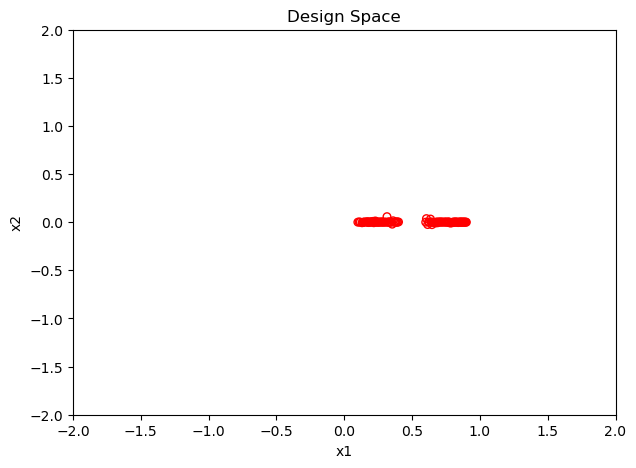

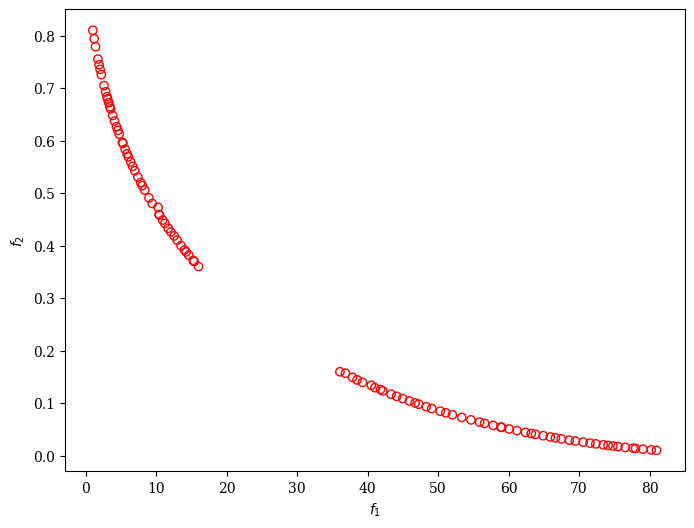

In [5]:
problem = MyProblem()

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history=True,
               verbose=True)

X = res.X
F = res.F

xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1], xu[1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Design Space")
plt.show()



plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(F, facecolor="none", edgecolor="red")
plot.show()

## eps: the change of the indicator (ideal, nadir, f) over the last few (3) generations 
##(only printed if the Pareto-front is unknown)
## https://www.egr.msu.edu/~kdeb/papers/c2020003.pdf

## cv= constraint violation in the current population
## indicator: printed only if PF is known (or provided?) 




n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |     13 |             - |             -
     2 |      200 |     19 |  0.5685942780 |         nadir
     3 |      300 |     33 |  0.0179526805 |             f
     4 |      400 |     53 |  0.0102445419 |         ideal
     5 |      500 |     67 |  0.3581789712 |         nadir
     6 |      600 |     91 |  0.5877031396 |         nadir
     7 |      700 |    100 |  0.0036169934 |         ideal
     8 |      800 |    100 |  0.0025326179 |             f
     9 |      900 |    100 |  0.0016719357 |             f
    10 |     1000 |    100 |  0.0156495337 |         nadir
    11 |     1100 |    100 |  0.0090702894 |         nadir
    12 |     1200 |    100 |  0.0031101233 |         ideal
    13 |     1300 |    100 |  0.0081079020 |         nadir
    14 |     1400 |    100 |  0.0011757706 |             f
    15 |     1500 |    100 |  0.0017899652 |             f
    16 |     1600 |    100 |  0.0020499356 |            

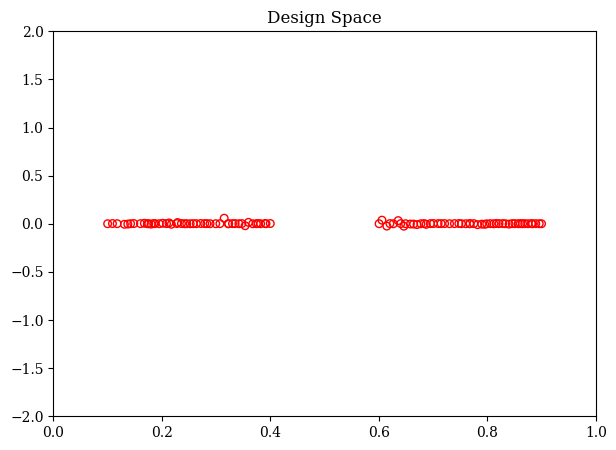

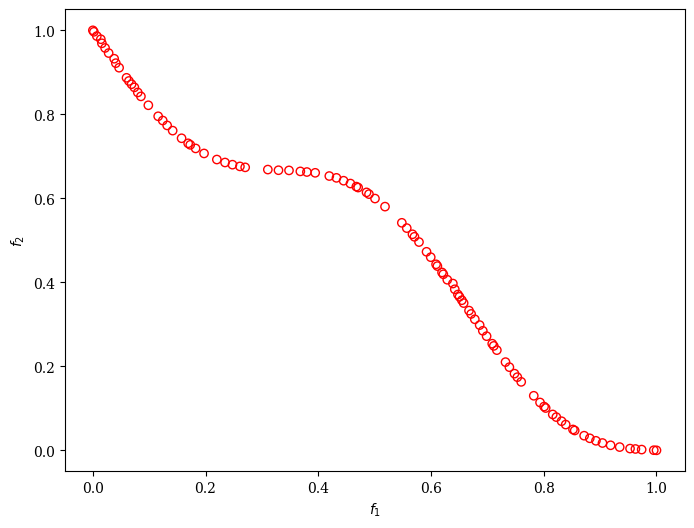

In [6]:
def F1(x):
    return x[0]

def wrap_F2(a,b):
    def F2(x):
        return 1 - x[0] - a * np.sin(b * np.pi * x[0]) + x[1]**2 
    return F2

def solution(a,b):
    def frontier(w1,w2):
        return 1/(b*np.pi)* 1/(np.cos(1/(a*b*np.pi)*(w1/w2 -1))) 
    return frontier


class OurStandardProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_ieq_constr=0,
                         a=0.1,
                         b=3.,
                         xl=np.array([0,-2]),
                         xu=np.array([1,2]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = F1(x)
        f2 = wrap_F2(self.data['a'],self.data['b'])(x)

        out["F"] = [f1, f2]


        

#problem = get_problem("zdt1")
problem = OurStandardProblem()

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               verbose=True)


xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1], xu[1])
plt.title("Design Space")
plt.show()


plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

## Classic MOO problems

zdt3


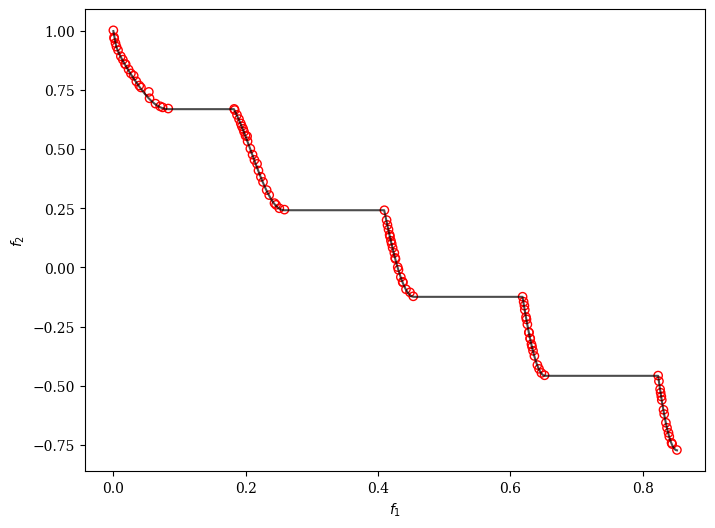

In [7]:
# Full description of these classical problems at
# https://pymoo.org/problems/multi/zdt.html

i=3
label_problem='zdt'+str(i)
print(label_problem)
problem = get_problem(label_problem)
algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

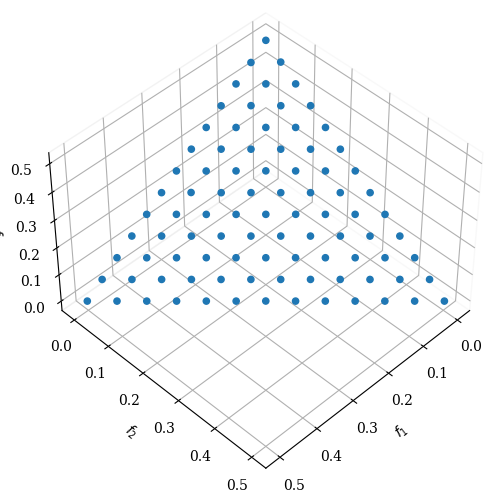

In [8]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
# create the reference directions to be used for the optimization
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)

# create the algorithm object
algorithm = NSGA3(pop_size=100,
                  ref_dirs=ref_dirs)

# execute the optimization
res = minimize(get_problem("dtlz1"),
               algorithm,
               seed=1,
               termination=('n_gen', 600))

plot = Scatter().add(res.F)
plot.show()

## Multi objective extension with custom operations

We extend the single objective subset selection problem defined in pymoo documentation. In particular we aim to solve  

$$ \min f_1(x)=\sum_{k=1}^n L_k\cdot x_k   \qquad L=\text{costs}$$
$$ \min f_2(x)=\sum_{k=1}^n R_k\cdot x_k   \qquad R=\text{time to collect}$$
$$ s.t.\qquad g(x)=\left(\sum_{k=1}^n x_k -10\right)^2 \qquad \text{only 10 items}$$

In [15]:
## single objective implementation can be found on pymoo website at:
## https://pymoo.org/case_studies/subset_selection.html


## The following classes define the components necessary to solve a 
## subset selection problem using a genetic algorithm approach. 
## The SubsetProblem class defines the optimization problem, while
## MySampling, BinaryCrossover, and MyMutation define the genetic
## algorithm's sampling, crossover, and mutation operations, respectively.



import numpy as np
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.crossover import Crossover
from pymoo.core.mutation import Mutation
from pymoo.core.sampling import Sampling


class SubsetProblem(ElementwiseProblem):
    '''
    This class represents the subset selection problem to be solved.

    __init__ method: It initializes the problem instance with parameters 
                     such as the sets L and R and the maximum number of 
                     selections n_max.
    
    _evaluate method: It evaluates the fitness of a given solution x by
                      calculating two objectives (f1 and f2) representing 
                      the sums of selected items from sets L and R, respectively. Additionally, it evaluates an inequality constraint representing the maximum number of selections.
    '''
    def __init__(self,
                 L,
                 R,
                 n_max
                 ):
        super().__init__(n_var=len(L), n_obj=2, n_eq_constr=1)
        self.L = L
        self.R = R
        self.n_max = n_max

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = np.sum(self.L[x])
        f2 = np.sum(self.R[x])
        out["F"] = [f1, f2]
        out["H"] = self.n_max - np.sum(x)


class MySampling(Sampling):
    '''
    This class is responsible for generating initial samples for 
    the optimization process.
    
    _do method: It generates binary matrices (X) where each row 
                represents a sample and each column represents 
                whether an item is selected or not.
        '''


    def _do(self, problem, n_samples, **kwargs):
        X = np.full((n_samples, problem.n_var), False, dtype=bool)

        for k in range(n_samples):
            I = np.random.permutation(problem.n_var)[:problem.n_max]
            X[k, I] = True

        return X


class BinaryCrossover(Crossover):
    '''
    This class defines the crossover operation for the genetic algorithm.
    
    _do method: It performs crossover between pairs of binary matrices (X)
                to produce offspring matrices (_X), maintaining the subset 
                selection property.
    '''
    def __init__(self):
        super().__init__(2, 1)

    def _do(self, problem, X, **kwargs):
        n_parents, n_matings, n_var = X.shape

        _X = np.full((self.n_offsprings, n_matings, problem.n_var), False)

        for k in range(n_matings):
            p1, p2 = X[0, k], X[1, k]

            both_are_true = np.logical_and(p1, p2)
            _X[0, k, both_are_true] = True

            n_remaining = problem.n_max - np.sum(both_are_true)

            I = np.where(np.logical_xor(p1, p2))[0]

            S = I[np.random.permutation(len(I))][:n_remaining]
            _X[0, k, S] = True

        return _X


class MyMutation(Mutation):
    '''
    This class defines the mutation operation for the genetic algorithm.
    _do method: It performs mutation on binary matrices (X) by randomly
                flipping selected items.
    '''
    def _do(self, problem, X, **kwargs):
        for i in range(X.shape[0]):
            X[i, :] = X[i, :]
            is_false = np.where(np.logical_not(X[i, :]))[0]
            is_true = np.where(X[i, :])[0]
            X[i, np.random.choice(is_false)] = True
            X[i, np.random.choice(is_true)] = False

        return X




# create the actual problem to be solved


np.random.seed(1)
L = np.array([np.random.randint(100) for _ in range(100)])
R = 1+ 10*np.array([np.random.randint(100) for _ in range(100)])/L
n_max = 10
problem = SubsetProblem(L,R, n_max)


Function value: [[ 191.          145.34202876]
 [ 217.          100.32043785]
 [ 179.          157.23619872]
 [ 532.           23.30733811]
 [  96.          511.49801587]
 [ 170.          166.33975603]
 [ 167.          170.26143435]
 [ 140.          238.17316017]
 [ 184.          155.25377678]
 [ 133.          257.03536598]
 [ 305.           48.74089435]
 [ 120.          335.20079365]
 [ 112.          387.3502886 ]
 [ 208.          108.4900807 ]
 [ 103.          408.58621934]
 [  89.          513.91955267]
 [ 400.           33.10365931]
 [ 279.           53.86284557]
 [  88.          603.36399711]
 [  75.         1190.40976536]
 [ 540.           22.30733038]
 [ 206.          116.786784  ]
 [ 203.          121.28511176]
 [  64.                   inf]
 [  83.          673.6478799 ]
 [ 115.          369.59659785]
 [ 478.           26.63670235]
 [ 150.          201.18066512]
 [ 100.          507.56240981]
 [ 544.           21.89049061]
 [ 186.          146.81780481]
 [ 177.          159.55

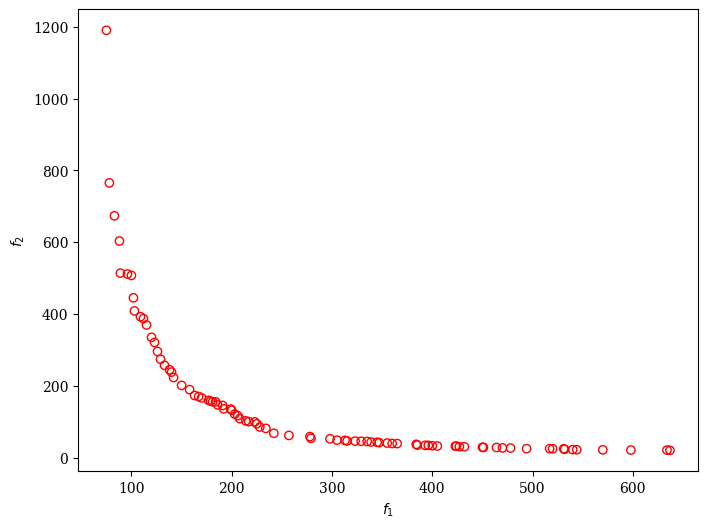

In [16]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.optimize import minimize

algorithm = NSGA2(
    pop_size=200,
    sampling=MySampling(),
    crossover=BinaryCrossover(),
    mutation=MyMutation(),
    eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history=False,
               verbose=False)

print("Function value: %s" % res.F)
print("Subsets:", [np.where(res.X[i])[0].tolist() for i in range(len(res.X))])




plot = Scatter()
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

